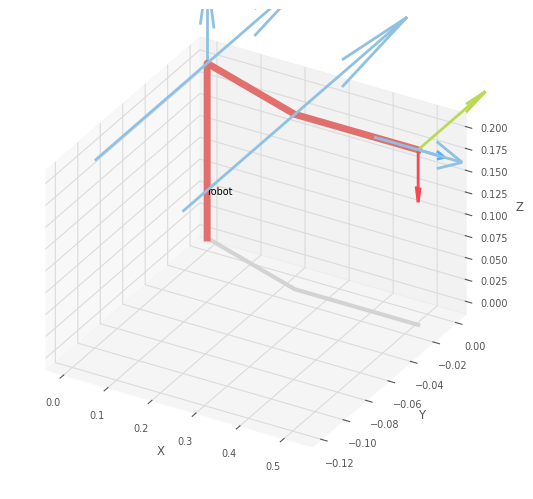

DHRobot: robot, 4 joints (RRRR), dynamics, modified DH parameters
┌──────┬────────┬───────────┬───────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │    θⱼ     │  dⱼ   │
├──────┼────────┼───────────┼───────┤
│  0.0 │   0.0° │        q1 │   0.2 │
│  0.0 │ -90.0° │  q2 - 90° │   0.0 │
│ 0.25 │   0.0° │  q3 + 90° │ -0.02 │
│  0.0 │  90.0° │        q4 │  0.28 │
└──────┴────────┴───────────┴───────┘

┌──┬──┐
└──┴──┘

   0.0007963  0         1         0.53      
   0         1         0        -0.02      
  -1         0         0.0007963  0.2004    
   0         0         0         1         



<Figure size 640x480 with 0 Axes>

In [10]:
import roboticstoolbox as rtb
from math import atan2,sqrt,cos,sin,pi
import math
import numpy as np
from spatialmath import *

l1 = 0.2   # 200 / 1000
l2 = 0.06  # 60 / 1000
l3 = 0.25  # 250 / 1000
l4 = 0.1   # 100 / 1000
l5 = 0.28  # 280 / 1000

robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=l1), 
        rtb.RevoluteMDH(alpha=-pi/2,offset=-pi/2),  
        rtb.RevoluteMDH(a=l3, d=-0.02,offset=pi/2), 
        rtb.RevoluteMDH(alpha=pi/2,d=l5) 
        
        
    ],
    name = "robot"    
)

#นำ config ที่คำนวณได้ไปพลอต
q = [0,1.57,0,0]
robot.plot(q)
print(robot)

T_0e = robot.fkine(q) 
print(T_0e) 

case 1: X <= l3 + l5
Inverse Kinematics did not converge to a solution.

case 2: Y <= l3 + l5
Inverse Kinematics did not converge to a solution.

case 3: Z <= l1 + l3 + l5
Inverse Kinematics did not converge to a solution.

case 4:  0.0009  <= x^2 + z^2 <= 0.2809
Inverse Kinematics did not converge to a solution.

Inverse Kinematics converge Solution:
[-0.13695534  0.01058346 -0.01058348  0.13695546]
Verification :
   1        -1.201e-07 -1.896e-08 -0.0001095  
   1.201e-07  1         2.613e-09 -0.02017   
   1.896e-08 -2.613e-09  1         0.73      
   0         0         0         1         



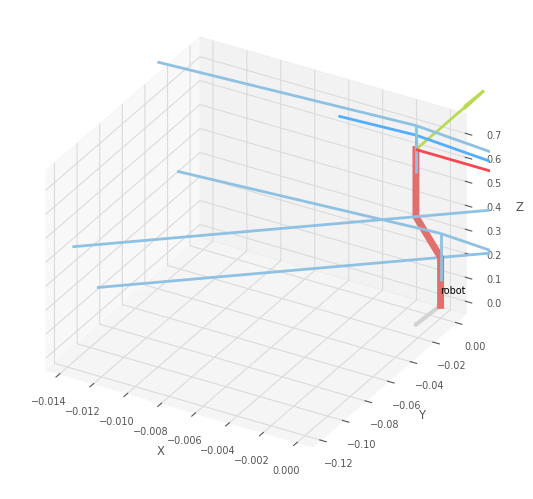

<Figure size 640x480 with 0 Axes>

In [158]:
import roboticstoolbox as rtb
from math import pi
import numpy as np
from spatialmath import SE3

l1 = 0.2    # 200 mm
l2 = 0.06   # 60 mm
l3 = 0.25   # 250 mm
l4 = 0.1    # 100 mm
l5 = 0.28   # 280 mm

robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=l1, alpha=0, offset=0), 
        rtb.RevoluteMDH(alpha=-pi/2, offset=-pi/2),  
        rtb.RevoluteMDH(a=l3, d=-0.02, offset=pi/2), 
        rtb.RevoluteMDH(alpha=pi/2, d=l5, offset=0) 
    ],
    name="robot"    
)
q_initial = [0.970, 0.595, 1.411, 0]
T_0e = robot.fkine(q_initial)

'''for display'''
# robot.plot(q_initial)
# print("Forward Kinematics (T_0e):")
# print(T_0e)
# print(robot)

def ikine_find(desired_pose,s):
    solution = robot.ikine_LM(desired_pose)

    if solution.success:
        q_ik = solution.q
        print("Inverse Kinematics converge Solution:")
        print(q_ik)
        T_verification = robot.fkine(q_ik)
        print("Verification :")
        print(T_verification)
        robot.plot(q_ik)
    else:
        print(s)
        print("Inverse Kinematics did not converge to a solution.")
        print()
        
#case 1 X <= l3 + l5
ikine_find(SE3(l3+l5+1.0, -0.02, 0.73),'case 1: X <= l3 + l5')
#case 2 Y <= l3 + l5
ikine_find(SE3(0.0, l3+l5+1.0, 0.73),'case 2: Y <= l3 + l5')
#case 3 Z <= l1 + l3 + l5
ikine_find(SE3(0.0, -0.02, l1 + l3 + l5 + 1),'case 3: Z <= l1 + l3 + l5')
#case 4  0.0009  <= x^2 + z^2 <= 0.2809 
ikine_find(SE3(l3+l5+1.0, -0.02, 0.73),'case 4:  0.0009  <= x^2 + z^2 <= 0.2809')
#case 4 reachable
ikine_find(SE3(0.0, -0.02, 0.73),'case 4:')
